In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import constants


In [3]:
# NEURAL NETWORK 

# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# first conv + input equal to 150x150 3color channel
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # second conv
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third conv
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth conv
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neurons hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # output for 17 neurons = 17 classes
    tf.keras.layers.Dense(17, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [4]:
# training parameters
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1.0/255.)


train_generator = train_datagen.flow_from_directory(
    constants.TRAINING_BASE_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
    constants.TESTING_BASE_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=10
)
    


Found 508 images belonging to 17 classes.
Found 64 images belonging to 17 classes.


In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    verbose=2,
)

Epoch 1/10
5/5 - 43s - loss: 2.7910 - acc: 0.1181 - val_loss: 2.7504 - val_acc: 0.1094 - 43s/epoch - 9s/step
Epoch 2/10
5/5 - 41s - loss: 2.7873 - acc: 0.0965 - val_loss: 2.7623 - val_acc: 0.1250 - 41s/epoch - 8s/step
Epoch 3/10
5/5 - 42s - loss: 2.7396 - acc: 0.1240 - val_loss: 2.7013 - val_acc: 0.1250 - 42s/epoch - 8s/step
Epoch 4/10
5/5 - 42s - loss: 2.7203 - acc: 0.1240 - val_loss: 2.7396 - val_acc: 0.0781 - 42s/epoch - 8s/step
Epoch 5/10
5/5 - 42s - loss: 2.7417 - acc: 0.0945 - val_loss: 2.7453 - val_acc: 0.1406 - 42s/epoch - 8s/step
Epoch 6/10
5/5 - 41s - loss: 2.7324 - acc: 0.1319 - val_loss: 2.7534 - val_acc: 0.0781 - 41s/epoch - 8s/step
Epoch 7/10
5/5 - 41s - loss: 2.7112 - acc: 0.1024 - val_loss: 4.0433 - val_acc: 0.1406 - 41s/epoch - 8s/step
Epoch 8/10
5/5 - 42s - loss: 3.0258 - acc: 0.0965 - val_loss: 2.6814 - val_acc: 0.1719 - 42s/epoch - 8s/step
Epoch 9/10
5/5 - 42s - loss: 2.6515 - acc: 0.1280 - val_loss: 2.6793 - val_acc: 0.1406 - 42s/epoch - 8s/step
Epoch 10/10
5/5 - 4

Text(0.5, 1.0, 'Training and validation loss')

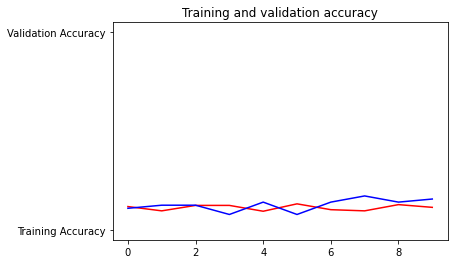

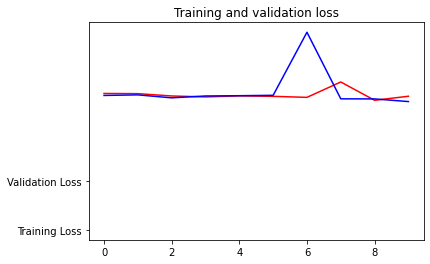

In [11]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)